https://codeloki.medium.com/lets-build-agents-with-mistral-8x-7b-and-groq-3f364ca81221

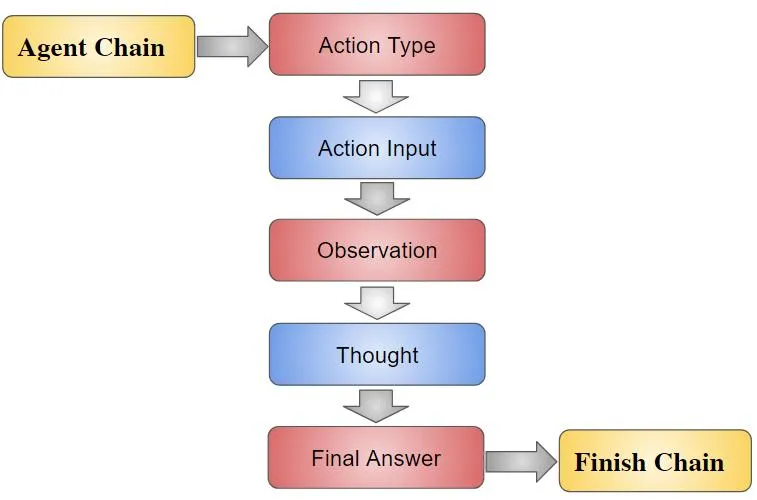

In [ ]:
!pip install duckduckgo-search==5.1.0
!pip install --upgrade langchain
!pip install langchain-groq #langchain module
!pip install wikipedia
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
from google.colab import userdata
API_KEY=userdata.get('API_KEY')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.4
    Uninstalling lxml-4.9.4:
      Successfully uninstalled lxml-4.9.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.5/810.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.9/273.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfull

In [ ]:
'''
#@title Setup
import os, subprocess

def setup():
    install_cmds = [
        ['pip', 'install', 'gradio'],
        ['pip', 'install', 'open_clip_torch'],
        ['pip', 'install', 'clip-interrogator'],
    ]
    for cmd in install_cmds:
        print(subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode('utf-8'))

setup()
'''

"\n#@title Setup\nimport os, subprocess\n\ndef setup():\n    install_cmds = [\n        ['pip', 'install', 'gradio'],\n        ['pip', 'install', 'open_clip_torch'],\n        ['pip', 'install', 'clip-interrogator'],\n    ]\n    for cmd in install_cmds:\n        print(subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode('utf-8'))\n\nsetup()\n"

In [ ]:
#Imports
from langchain.agents import Tool

In [ ]:
llm = ChatGroq(temperature=0.5, #If the temperature is set to a lower value, the model tends to produce more deterministic response
               groq_api_key=API_KEY,
               model_name="mixtral-8x7b-32768",
               max_tokens=20000) #Mistral context window is 32768 tokens, however we are limiting that to 20K tokens.

In [ ]:
from langchain.utilities import WikipediaAPIWrapper
wikipedia = WikipediaAPIWrapper()
wikipedia.run('Langchain')

'Page: LangChain\nSummary: LangChain is a framework designed to simplify the creation of applications using large language models (LLMs). As a language model integration framework, LangChain\'s use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.\n\n\n\nPage: DataStax\nSummary: DataStax, Inc. is a real-time data for AI company based in Santa Clara, California. Its product Astra DB is a cloud database-as-a-service based on Apache Cassandra. DataStax also offers DataStax Enterprise (DSE), an on-premises database built on Apache Cassandra, and Astra Streaming, a messaging and event streaming cloud service based on Apache Pulsar. As of June 2022, the company has roughly 800 customers distributed in over 50 countries.\n\nPage: Prompt engineering\nSummary: Prompt engineering is the process of structuring text that can be interpreted and understood by a generative AI model. A prompt is natural language 

In [ ]:
from langchain.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()
search.run("Euro to INR today?")

'No good DuckDuckGo Search Result was found'

In [ ]:
wikipedia_tool = Tool(
    name='wikipedia',
    func= wikipedia.run,
    description="Useful for when you need to look up a topic, country or person on wikipedia is the best website for fact check and any other details on any subject."
)

duckduckgo_tool = Tool(
    name='DuckDuckGo Search',
    func= search.run,
    description="Useful for when you need to do a search on the internet to find information that another tool can't find. Always be specific with your input."
)

In [ ]:
from langchain.tools import StructuredTool

import requests  # Import requests library to make HTTP requests

'''
def search_function(query: str):
    # Define the URL of the API endpoint
    api_url = f"https://api.example.com/search?q={query}"

    try:
        # Make a GET request to the API
        response = requests.get(api_url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Extract and return the relevant information from the API response
            return response.json()  # Assuming the API returns JSON data
        else:
            # If the request was unsuccessful, raise an exception or return an error message
            response.raise_for_status()  # Raise an exception for non-200 status codes
    except requests.RequestException as e:
        # Handle any exceptions that occur during the request
        print("Error:", e)
        return None  # Return None or an error message

search = StructuredTool.from_function(
    func=search_function,
    name="Search",
    description="useful for when you need to answer questions about current events",
)
'''

'\ndef search_function(query: str):\n    # Define the URL of the API endpoint\n    api_url = f"https://api.example.com/search?q={query}"\n\n    try:\n        # Make a GET request to the API\n        response = requests.get(api_url)\n\n        # Check if the request was successful (status code 200)\n        if response.status_code == 200:\n            # Extract and return the relevant information from the API response\n            return response.json()  # Assuming the API returns JSON data\n        else:\n            # If the request was unsuccessful, raise an exception or return an error message\n            response.raise_for_status()  # Raise an exception for non-200 status codes\n    except requests.RequestException as e:\n        # Handle any exceptions that occur during the request\n        print("Error:", e)\n        return None  # Return None or an error message\n\nsearch = StructuredTool.from_function(\n    func=search_function,\n    name="Search",\n    description="useful for

In [ ]:
from langchain.agents import Tool

tools = [
    Tool(
        name = "DuckDuckGo Search",
        func=duckduckgo_tool.run,
        description="useful for when you need answer questions from internet"
    )
]


tools.append(wikipedia_tool)
tools.append(search)

In [ ]:
from langchain.agents import initialize_agent

zero_shot_agent = initialize_agent(
    agent="zero-shot-react-description",
    tools=tools,
    llm=llm,
    verbose=True,
    handle_parsing_errors=True,
    max_iterations=10,
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(


In [ ]:
'''
caption_model_name = 'blip-large'
clip_model_name = 'ViT-L-14/openai'

import gradio as gr
from clip_interrogator import Config, Interrogator

config = Config()
config.clip_model_name = clip_model_name
config.caption_model_name = caption_model_name
ci = Interrogator(config)

def image_to_prompt(image, mode):
    ci.config.chunk_size = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    ci.config.flavor_intermediate_count = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    image = image.convert('RGB')
    if mode == 'best':
        return ci.interrogate(image)
    elif mode == 'classic':
        return ci.interrogate_classic(image)
    elif mode == 'fast':
        return ci.interrogate_fast(image)
    elif mode == 'negative':
        return ci.interrogate_negative(image)

from PIL import Image
image_path="/content/example01.jpg"
image = Image.open(image_path)
text=image_to_prompt(image, "best")

'''

'\ncaption_model_name = \'blip-large\'\nclip_model_name = \'ViT-L-14/openai\'\n\nimport gradio as gr\nfrom clip_interrogator import Config, Interrogator\n\nconfig = Config()\nconfig.clip_model_name = clip_model_name\nconfig.caption_model_name = caption_model_name\nci = Interrogator(config)\n\ndef image_to_prompt(image, mode):\n    ci.config.chunk_size = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024\n    ci.config.flavor_intermediate_count = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024\n    image = image.convert(\'RGB\')\n    if mode == \'best\':\n        return ci.interrogate(image)\n    elif mode == \'classic\':\n        return ci.interrogate_classic(image)\n    elif mode == \'fast\':\n        return ci.interrogate_fast(image)\n    elif mode == \'negative\':\n        return ci.interrogate_negative(image)\n\nfrom PIL import Image\nimage_path="/content/example01.jpg"\nimage = Image.open(image_path)\ntext=image_to_prompt(image, "best")\n\n'

In [ ]:
'''
title="lasagne"
text="Lasagna is a classic Italian dish known for its layers of pasta, rich sauce, and melted cheese. "
    Lists:
    <Allergens list>: [Cereals,Crustaceans,Egg,Fish,Peanuts,SOYBEAN,Latte,Nuts,Celery,Mustard,Sesame seeds,Sulfur dioxide and sulphites,Shell,Clams]

    <Additional Information list>:
    [Spicy, Vegan, Gluten free, Vegetarian]

'''

'\ntitle="lasagne"\ntext="Lasagna is a classic Italian dish known for its layers of pasta, rich sauce, and melted cheese. "\n    Lists:\n    <Allergens list>: [Cereals,Crustaceans,Egg,Fish,Peanuts,SOYBEAN,Latte,Nuts,Celery,Mustard,Sesame seeds,Sulfur dioxide and sulphites,Shell,Clams]\n\n    <Additional Information list>: \n    [Spicy, Vegan, Gluten free, Vegetarian]\n\n'

In [ ]:

title = r"Lasagne"
image_description=r"Lasagna is a classic Italian dish known for its layers of pasta, rich sauce, and melted cheese."
recipe_prompt = f"""
As a restaurant menu manager, your role is to gather essential details about a dish based on its title and description, and format the output in JSON. Please provide the following information:
1. Ingredients: List all ingredients included in the dish.
2. Description: Briefly describe the dish.
3. Additional Information: Choose relevant options from this list - [Cereals, Crustaceans, Egg, Fish, Peanuts, SOYBEAN, Latte, Nuts, Celery, Mustard, Sesame seeds, Sulfur dioxide and sulphites, Shell, Clams].
4. Allergens: Select from the following options - [Spicy, Vegan, Gluten free, Vegetarian].

Title:
<{title}>

Description:
<{image_description}>
"""


In [ ]:

recipe_information = zero_shot_agent.run(recipe_prompt)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
To answer this question, I need to find out the ingredients typically used in lasagna and check if there are any common allergens or additional information related to this dish.

Action: duckduckgo_search
Action Input: Lasagne recipe ingredients

Observation: No good DuckDuckGo Search Result was found
Thought:It seems that DuckDuckGo Search didn't find any good results for the recipe ingredients of lasagna. Let me try Wikipedia to get the ingredients and other necessary details.

Action: wikipedia
Action Input: Lasagna

Observation: Page: Lasagna
Summary: Lasagna (US: , also UK: ; Italian: [laˈzaɲɲa]; also known as lasagne, Italian: [laˈzaɲɲe]) is a type of pasta, possibly one of the oldest types, made of very wide, flat sheets. Either term can also refer to an Italian dish made of stacked layers of lasagna alternating with fillings such as ragù (ground meats and tomato sauce), béchamel sauce, vegetables, cheeses (which may include ricotta, mozza

In [ ]:
'''
goal = """promotions"""
goal_image_description = """
Discounts: Offer discounts or special pricing,
such as happy hour deals, early bird specials, or discounts for seniors,
students, or military personnel. Promotions like
"buy one, get one free" or percentage discounts can also attract customers.
"""

goal_prompt = f"""
As a social media content manager, your task is to create 3 compelling series of
promotional post for Facebook and Instagram based on the given <Goal> and <Description>.

These posts should showcase irresistible <Goal>, embodying a tone inspired by the provided <description>.
Ensure to incorporate relevant hashtags,emoji's and a persuasive call-to-action tailored specifically for restaurants.
The output should follow the format provided in <Output> section

Goal:
<{goal}>

Description:
<{goal_image_description}>

Output:
3 posts, as dictionary, where keys donate the post number and values present the posts.
"""

'''

'\ngoal = """promotions"""\ngoal_image_description = """\nDiscounts: Offer discounts or special pricing, \nsuch as happy hour deals, early bird specials, or discounts for seniors, \nstudents, or military personnel. Promotions like \n"buy one, get one free" or percentage discounts can also attract customers.\n"""\n\ngoal_prompt = f"""\nAs a social media content manager, your task is to create 3 compelling series of \npromotional post for Facebook and Instagram based on the given <Goal> and <Description>. \n\nThese posts should showcase irresistible <Goal>, embodying a tone inspired by the provided <description>. \nEnsure to incorporate relevant hashtags,emoji\'s and a persuasive call-to-action tailored specifically for restaurants. \nThe output should follow the format provided in <Output> section\n\nGoal:\n<{goal}>\n\nDescription:\n<{goal_image_description}>\n\nOutput:\n3 posts, as dictionary, where keys donate the post number and values present the posts.\n"""\n\n'

In [ ]:
'''
goal_information = zero_shot_agent.run(goal_prompt)
'''

'\ngoal_information = zero_shot_agent.run(goal_prompt)\n'

In [ ]:
'''
print(goal_information)
'''

'\nprint(goal_information)\n'